In [1]:
from dLdp import L,dLdp
import numpy as np
from jax import grad,jit
from matplotlib import pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

%load_ext autoreload
%autoreload 2


In [2]:
n_sensors=3

C1s = np.ones(n_sensors,)*0.01
C0s = np.ones(n_sensors,)*0.2
b = np.ones(n_sensors,)*-2
k = np.ones(n_sensors,)


In [13]:
f_L = L(C1s,C0s,k,b)
f_dLdp = dLdp(C1s,C0s,k,b)

In [113]:
def pol2cart(r,theta):
    return np.array([r*np.cos(theta),r*np.sin(theta)])
r_max = 8
r_min = 0.1
n_circles = 10

r_range = np.exp(np.linspace(-2,2,n_circles))

n_samples_per_circle = 10

fanout_angles = np.linspace(0,2*np.pi,n_samples_per_circle)

thetas = np.array([np.linspace(0,fa,n_sensors) for fa in fanout_angles])

q = np.zeros(2,)
ps = np.ones((n_sensors,2))+np.random.random((n_sensors,2))-0.5

In [57]:
thetas.shape

(10, 3)

In [58]:
r_range.shape

(10,)

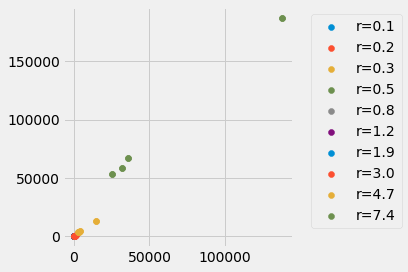

In [114]:
for r in r_range:
    ps = pol2cart(r,thetas).transpose(1,2,0)

    f_val = [float(f_L(q,ps[i])) for i in range(len(ps))]

    df_mag = [np.linalg.norm(f_dLdp(q,ps[i])) for i in range(len(ps))]
    plt.scatter(df_mag,f_val,label='r={0:.1f}'.format(np.linalg.norm(ps[0,0,:])))
plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper left')
plt.tight_layout()
plt.show()

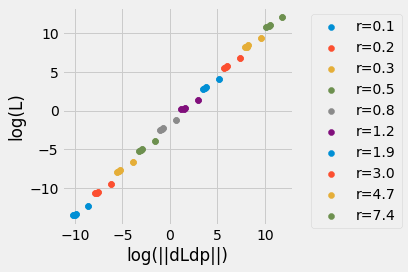

In [115]:
for r in r_range:
    ps = pol2cart(r,thetas).transpose(1,2,0)

    f_val = [float(f_L(q,ps[i])) for i in range(len(ps))]

    df_mag = [np.linalg.norm(f_dLdp(q,ps[i])) for i in range(len(ps))]
    plt.scatter(np.log(df_mag),np.log(f_val),label='r={0:.1f}'.format(np.linalg.norm(ps[0,0,:])))
plt.xlabel('log(||dLdp||)')
plt.ylabel('log(L)')
plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper left')
plt.tight_layout()
plt.show()